| # | strategy            | accuracy (train) | accuracy (test)|
|---|---------------------|------------------|----------------|
| 1 | x -> y              | 98%              | 92,7%          |
| 2 | clean(x) -> y       |                  |                |
| 3 | clean(x) + sbj -> y | 98% - ?          | 92,6% - ?      |

RandomForest -- n_estimators = 100, random_state = 42

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [9]:
PATH_TRAIN_X = "../UCI_HAR_Dataset/train/X_train.txt"
PATH_TRAIN_Y = "../UCI_HAR_Dataset/train/y_train.txt"

PATH_TEST_X = "../UCI_HAR_Dataset/test/X_test.txt"
PATH_TEST_Y = "../UCI_HAR_Dataset/test/y_test.txt"

PATH_TRAIN_SBJ = "../UCI_HAR_Dataset/train/subject_train.txt"

PATH_TEST_SBJ = "../UCI_HAR_Dataset/test/subject_test.txt"

PATH_FT = "../UCI_HAR_Dataset/features.txt"
features = pd.read_csv(PATH_FT, sep=" ", header=None, index_col=0).reset_index()

--- 
# Phase 1

### TRAINING

In [10]:
df_x_train = pd.read_fwf(PATH_TRAIN_X, header=None)
df_x_train.rename(columns=features[1], inplace=True)

y_train_col = pd.read_fwf(PATH_TRAIN_Y, header=None)

print(f"x_train shape: {df_x_train.shape}\ny_train shape: {y_train_col.shape}")

x_train shape: (7352, 561)
y_train shape: (7352, 1)


In [11]:
# SPLITTING
X_train, X_test, y_train, y_test = train_test_split(df_x_train, y_train_col, random_state=42, test_size=0.3)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (5146, 561)
X_test shape: (2206, 561)
y_train shape: (5146, 1)
y_test shape: (2206, 1)


In [12]:
# LogisticRegression implementation
# model_1 = RandomForestClassifier(n_estimators=100, random_state=42)

model_1 = LogisticRegression(
    random_state=42,
    max_iter=1000,
    penalty='l2')
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

print(accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9800543970988214


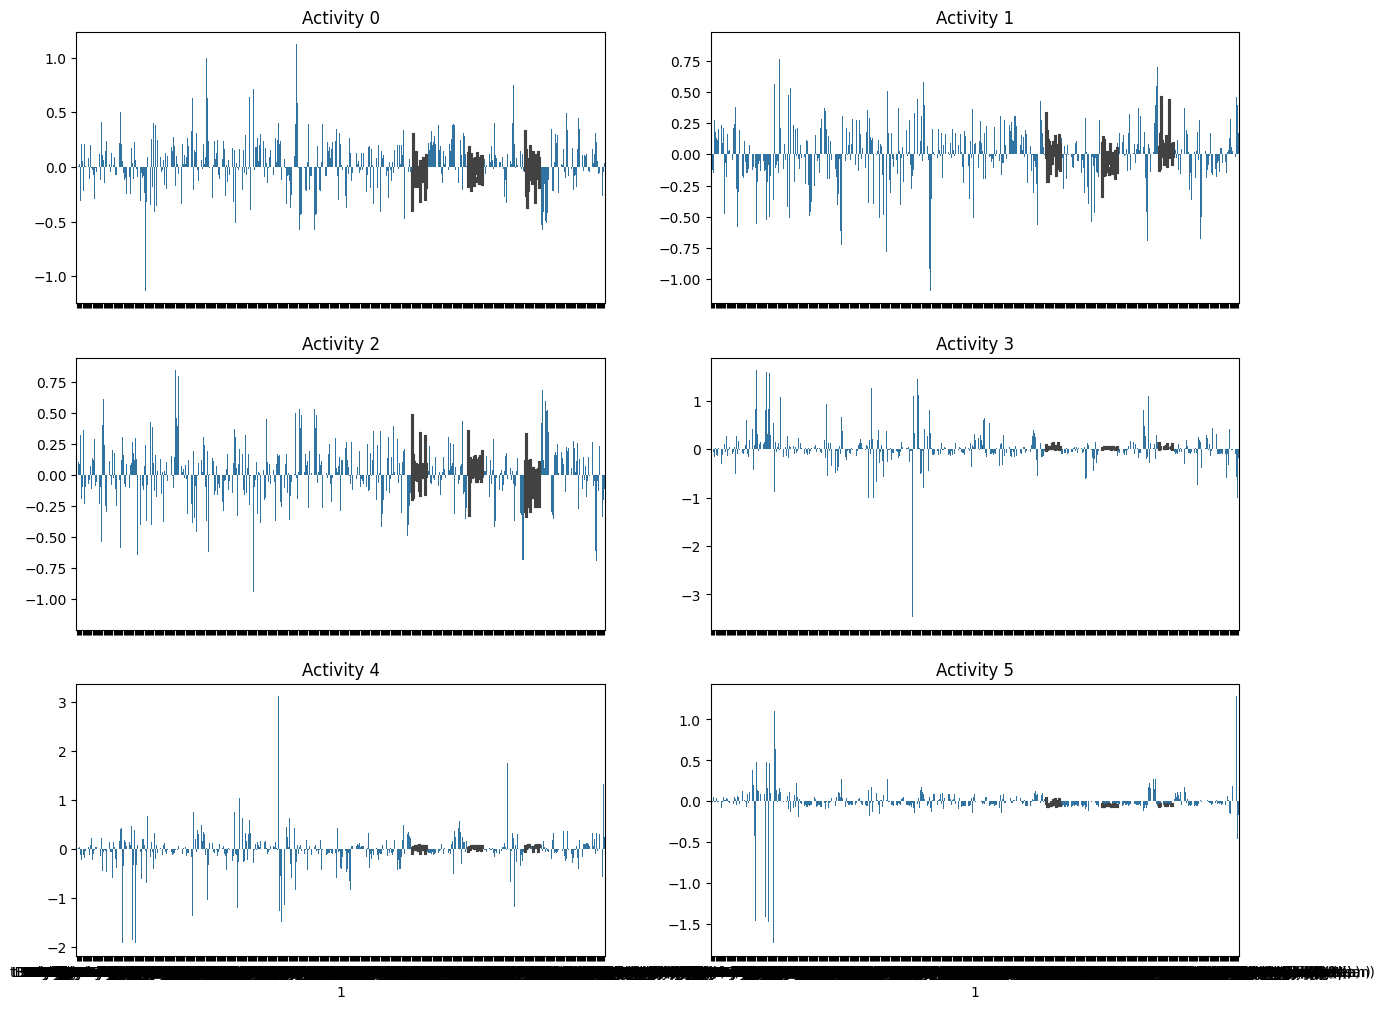

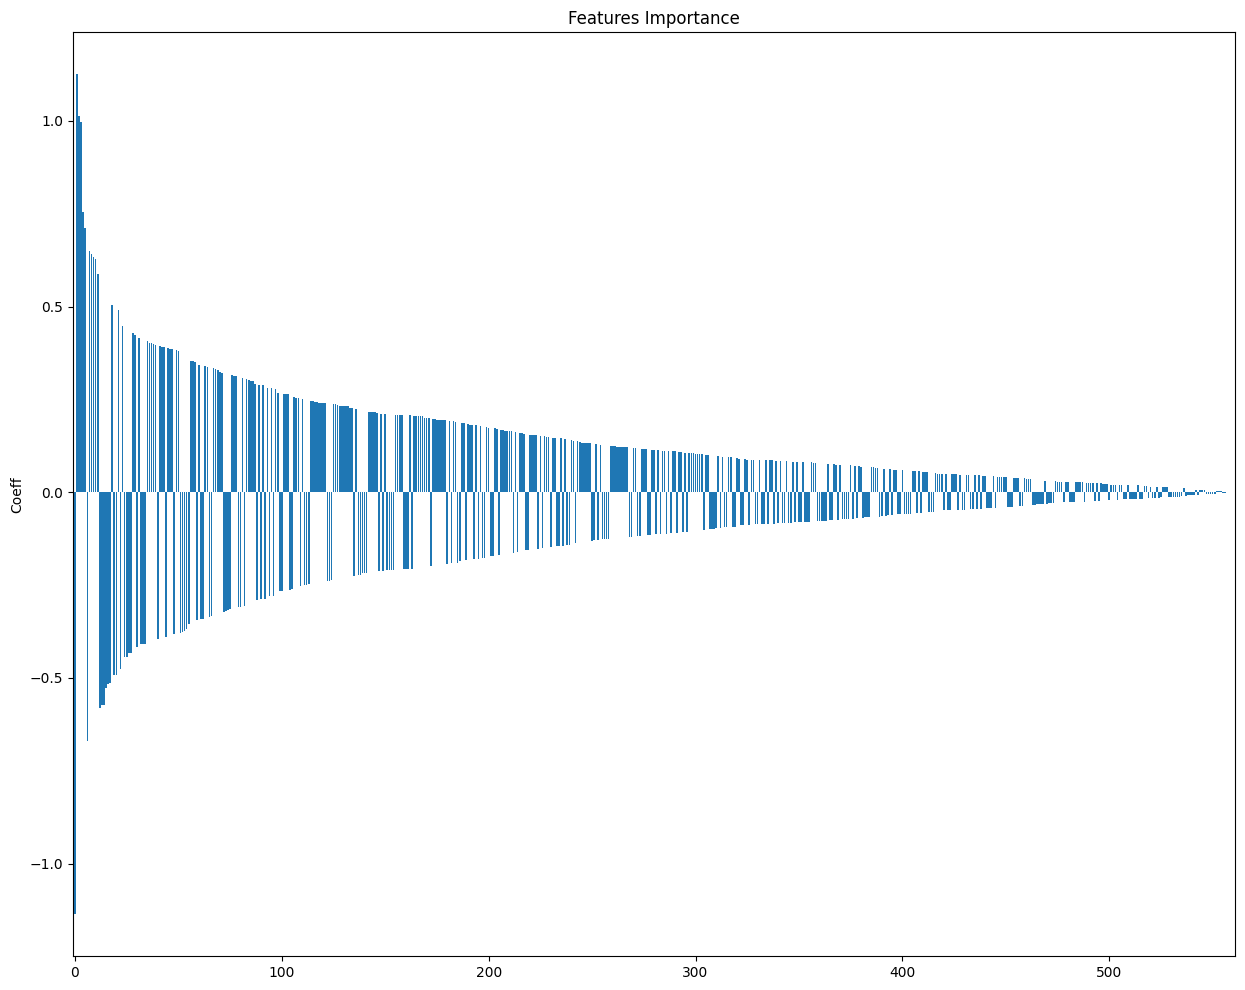

In [18]:
# Components plotting
weights = model_1.coef_
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
for i in range(3):
    for j in range(2):
        sns.barplot(x=features[1], y=weights[i*2+j], ax=axes[i, j])
        axes[i, j].set_title(f"Activity {i*2+j}")
plt.show()

importances = model_1.coef_[0]
indices = np.argsort(np.abs(importances))[::-1]

# Plot
plt.figure(figsize=(15, 12))
plt.title("Features Importance")
plt.bar(range(X_test.shape[1]), importances[indices], align="center")
plt.xlim([-1, X_test.shape[1]])
plt.ylabel("Coeff")
plt.show()


In [21]:
print(indices)

[ 62 198  37 117 450 159 297 102 156 118 104 199 504 201 214 503 508 143
  39 507 502 526 296 537 215 202 216 203  65  56 509  22 505  70 274  69
 449 182 433 368 302 197 209 222 157 367 371  71   9 354 369 243  28 193
 490  72 234 538 512  66 295 268  94 427 527 189 444 348 103 474 158 260
 141  63 497 310 377 552 237  57   3 108 236 139 317 166 516 152 314 518
  16 378 281 351 122  84 442  87 246 134 558 100 179 163 242 489  67 130
 366 194 127  48  45 195 181 288 374  73  27 168 132 233  61 394 519 119
 124 184 446 553 231 226 350 347 269 261  52 513   6 207 220 514 345  38
 517   4   7 384  95 149 183 219 206 105 477 238  40 451 114 376 210 223
 364 532 352 539  12 291 349 293 289 272  81 165 430 356 250 204 217  88
 186 264 265 465 101 271 535 161 162 487 228 263 382 315 396  68  85 395
 305 140 531  89 307  49 170 386 147 536 133 266 549 523  74 230  79 106
 461 175 475 506 346 355 142 287  93 150 391 227 456 359 316 275 365 358
  25  26 372  86 172 495 320 107 136 482 353 486  8

### TESTING

In [ ]:
df_x_test = pd.read_fwf(PATH_TEST_X, header=None)
df_x_test.rename(columns=features[1], inplace=True)

y_test_col = pd.read_fwf(PATH_TEST_Y, header=None)

print(f"x_test shape: {df_x_test.shape}\ny_test shape: {y_test_col.shape}")

In [ ]:
y_pred_eval = model_1.predict(df_x_test)

print(accuracy_score(y_test_col, y_pred_eval))

--- 
# Phase 2

### TRAINING

In [ ]:
df_x_train = pd.read_fwf(PATH_TRAIN_X, header=None)
df_x_train.rename(columns=features[1], inplace=True)

y_train_col = pd.read_fwf(PATH_TRAIN_Y, header=None)

print(f"x_train shape: {df_x_train.shape}\ny_train shape: {y_train_col.shape}")

In [ ]:
# Null values
print(df_x_train.isnull().values.any())

In [ ]:
# SPLITTING
X_train, X_test, y_train, y_test = train_test_split(df_x_train, y_train_col, random_state=42, test_size=0.3)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

In [ ]:
# LogisticRegression implementation
model_2 = LogisticRegression(
    random_state=42,
    max_iter=1000,
    penalty='l2')
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

print(accuracy_score(y_test, y_pred))

In [ ]:
# Components plotting
weights = model_2.coef_
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
for i in range(3):
    for j in range(2):
        sns.barplot(x=features[1], y=weights[i*2+j], ax=axes[i, j])
        axes[i, j].set_title(f"Activity {i*2+j}")
plt.show()

importances = model_2.coef_[0]
indices = np.argsort(np.abs(importances))[::-1]

# Plot
plt.figure(figsize=(15, 12))
plt.title("Features Importance")
plt.bar(range(X_test.shape[1]), importances[indices], align="center")
plt.xlim([-1, X_test.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Coefficiente")
plt.show()

### TESTING

In [ ]:
df_x_test = pd.read_fwf(PATH_TEST_X, header=None)
df_x_test.rename(columns=features[1], inplace=True)

y_test_col = pd.read_fwf(PATH_TEST_Y, header=None)

print(f"x_test shape: {df_x_test.shape}\ny_test shape: {y_test_col.shape}")

In [ ]:
y_pred_eval = model_2.predict(df_x_test)

print(accuracy_score(y_test_col, y_pred_eval))

--- 
# Phase 3

Add sbj column

In [22]:
df_x_train = pd.read_fwf(PATH_TRAIN_X, header=None)
df_x_train.rename(columns=features[1], inplace=True)

df_sbj_train = pd.read_fwf(PATH_TRAIN_SBJ, header=None)
df_x_train['user'] = df_sbj_train.values

y_train_col = pd.read_fwf(PATH_TRAIN_Y, header=None)

print(f"x_train shape: {df_x_train.shape}\ny_train shape: {y_train_col.shape}\nsbj_train shape: {df_sbj_train.shape}")

x_train shape: (7352, 562)
y_train shape: (7352, 1)
sbj_train shape: (7352, 1)


In [23]:
# SPLITTING
X_train, X_test, y_train, y_test = train_test_split(df_x_train, y_train_col, random_state=42, test_size=0.3)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (5146, 562)
X_test shape: (2206, 562)
y_train shape: (5146, 1)
y_test shape: (2206, 1)


In [24]:
# LogisticRegression implementation
model_3 = LogisticRegression(
    random_state=42,
    max_iter=1000,
    penalty='l2')
model_3.fit(X_train, y_train)

y_pred = model_3.predict(X_test)

print(accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9818676337262012


ValueError: array length 562 does not match index length 561

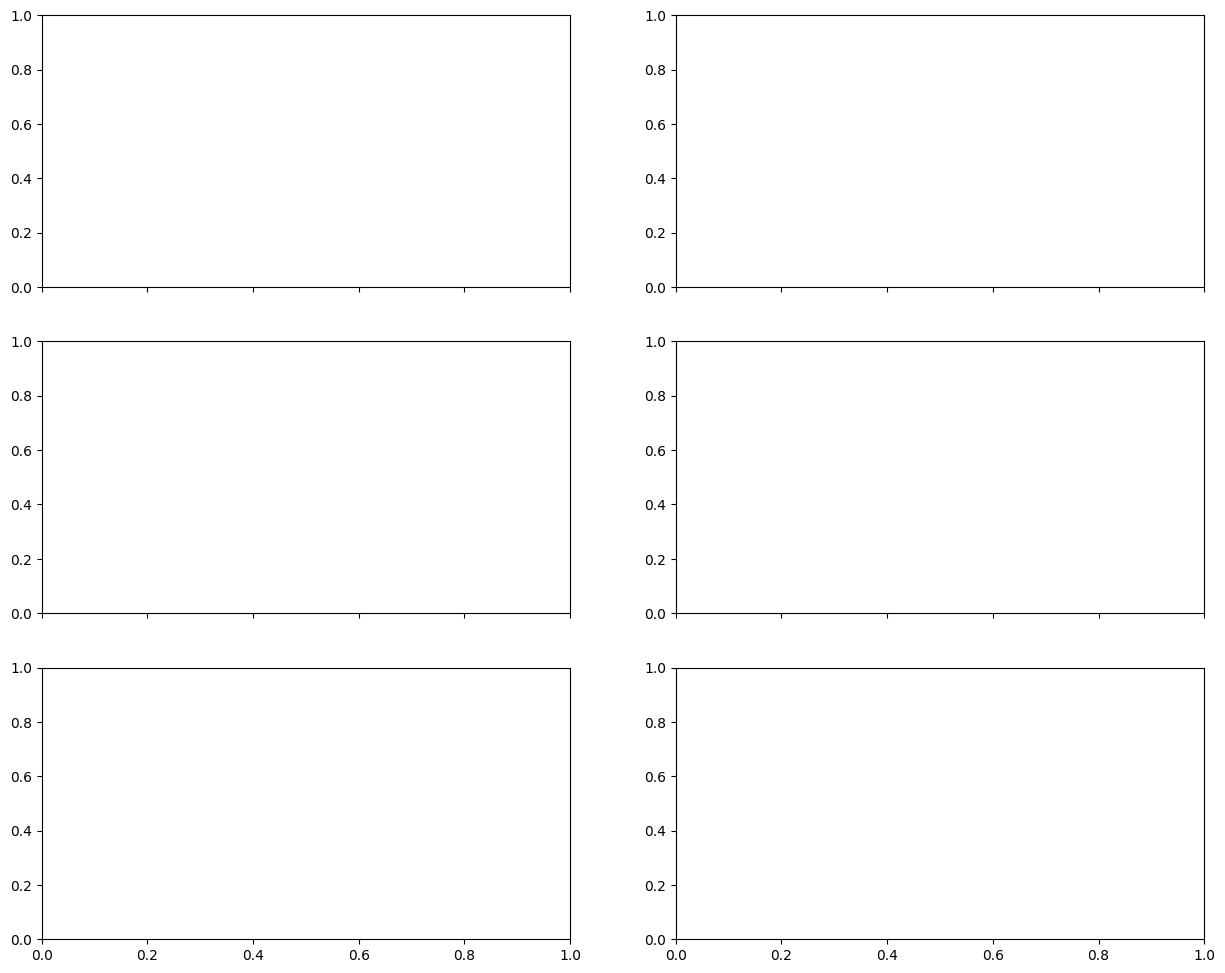

In [25]:
# Components plotting
weights = model_3.coef_
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
for i in range(3):
    for j in range(2):
        sns.barplot(x=features[1], y=weights[i*2+j], ax=axes[i, j])
        axes[i, j].set_title(f"Activity {i*2+j}")
plt.show()

importances = model_3.coef_[0]
indices = np.argsort(np.abs(importances))[::-1]

# Plot
plt.figure(figsize=(15, 12))
plt.title("Features Importance")
plt.bar(range(X_test.shape[1]), importances[indices], align="center")
plt.xlim([-1, X_test.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Coefficiente")
plt.show()

In [ ]:

print(f"importance\n['user'] = {importances.loc[561,0]}\non\nmax = {importances.loc[:,0].max()}\nmin = {importances.loc[:,0].min()}\navg = {importances.loc[:,0].mean()}")

### TESTING

In [ ]:
df_x_test = pd.read_fwf(PATH_TEST_X, header=None)
df_x_test.rename(columns=features[1], inplace=True)

df_sbj_test = pd.read_fwf(PATH_TEST_SBJ, header=None)
df_x_test['user'] = df_sbj_test.values

y_test_col = pd.read_fwf(PATH_TEST_Y, header=None)

print(f"x_test shape: {df_x_test.shape}\ny_test shape: {y_test_col.shape}")

In [ ]:
y_pred_eval = model_3.predict(df_x_test)

print(accuracy_score(y_test_col, y_pred_eval))

---